<h1>Linear Algebra and its Applications</h1>
<h3>Fifth Edition<br>by Lay, Lay, and McDonald</h3>
<p>Notes and examples of how to use Python for linear algebra problem solving by Michael K Schumacher<br><a href="http://mkschumacher.com">mkschumacher.com</a></p>

In [1]:
"""
Python version 2.7, running in Jupyter notebook
Encoding: UTF-8
"""

# Import the necessary modules to work with linear algebra

# Sympy and numpy will be used for arrays, matrices, symbolic algebra, etc
import sympy as sy
import numpy as np

# Matplotlib.pyplot will be used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib notebook

# Will use init_printing to display nice, LaTeX-based matrices, etc
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False, no_global=True)

<h2>Section 1.3</h2>

<p><b>Vectors</b> are essentially matrices with only one column. A vector with two entries is said to exist in $\mathbb{R}^2$ vector space (can be thought of as simply two-dimensional space, though mathematically $\mathbb{R}^2$ is more abstract).</p>

<p>Vectors are only equal if the <i>corresponding</i> entries are equal, e.g. in $\mathbb{R}^2$,<br>
$\left[ \begin{array}{r} 5 \\ 3 \\ \end{array} \right]$ and $\left[ \begin{array}{r} 3 \\ 5 \\ \end{array} \right]$<br>
are <b>not</b> equal.</p>

<p>Vectors can also be written with parentheses and commas, like we do for Cartesian coordinates, but <b>not</b> as a 1 by 2 matrix:</p>

<p>$\left[ \begin{array}{r} 5 \\ 3\\ \end{array} \right] = (5, 3) \neq \left[ \begin{array}{rr} 5 & 3 \\ \end{array} \right]$</p>

<p>Arithmetic with vectors is done by performing the operation on each element individually. E.g.</p>

<p>$\left[ \begin{array}{r} 5 \\ 3 \\ \end{array} \right] + \left[ \begin{array}{r} 9 \\ -4 \\ \end{array} \right] = \left[ \begin{array}{r} 5 + 9 \\ 3 + (-4) \\ \end{array} \right] = \left[ \begin{array}{r} 14 \\ -1 \\ \end{array} \right]$</p>

<p>Since vectors are essentially one-columned matrices, Python can be used in exactly the same way as working with matrices</p>

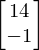

In [2]:
a = sy.Matrix([[5], [3]])
b = sy.Matrix([[9], [-4]])
a + b

Multiplication (and, by extension, division) between a vector and a scalar is done by multiplying each element in the vector by the scalar:

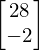

In [3]:
2 * (a + b)

<h3>Example 1: basic vector math</h3>

In [4]:
u = sy.Matrix([[1], [-2]])
v = sy.Matrix([[2], [-5]])

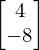

In [5]:
4 * u

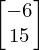

In [6]:
-3 * v

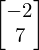

In [7]:
4 * u + (-3) * v

<h3>Example 2: graphical representations of vectors</h3>

In [8]:
u = sy.Matrix([[2], [2]])
v = sy.Matrix([[-6], [1]])
w = u + v

<IPython.core.display.Javascript object>


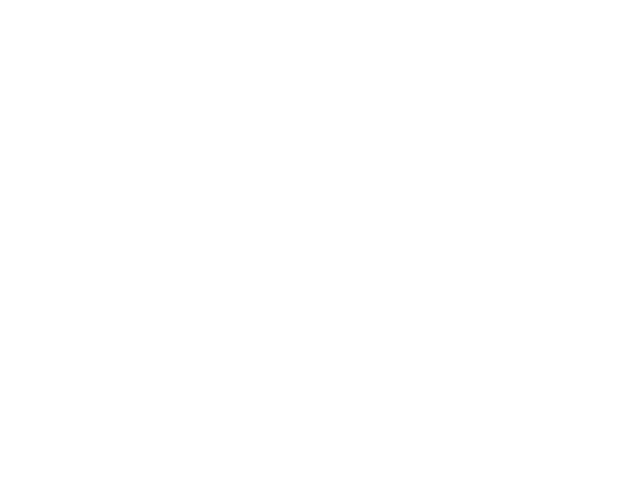

In [9]:
plt.scatter(u[0], u[1], label="u", color="k")
plt.scatter(v[0], v[1], label="v", color="g")
plt.scatter(w[0], w[1], label="u + v", color="r")
plt.grid(True)
plt.axis([-8, 8, -5, 5])
plt.legend(loc="best")
plt.show()

In [10]:
plt.close()

<h3>Example 3: graphing scalar multiples of a vector</h3>

In [11]:
u = sy.Matrix([[3], [-1]])

<IPython.core.display.Javascript object>


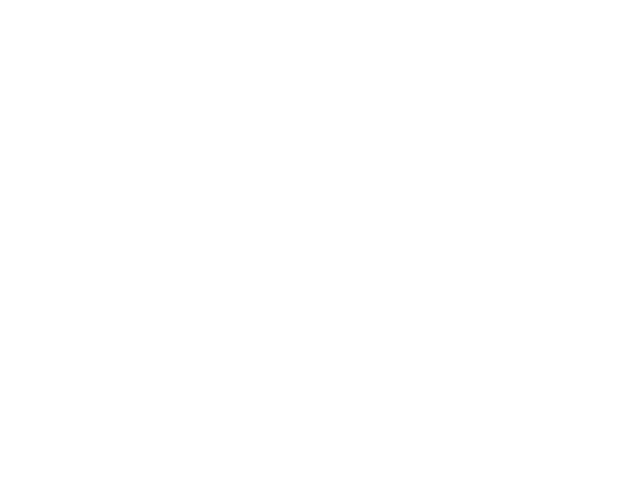

In [12]:
plt.scatter(u[0], u[1], color="r", label="u")
plt.scatter(2 * u[0], 2 * u[1], color="g", label="2u")
plt.scatter((-2.0)/3 * u[0], (-2.0)/3 * u[1], color="m", label="-2/3 u")
plt.grid(True)
plt.axis([-8, 8, -3, 3])
plt.legend(loc="best")
plt.show()

In [13]:
plt.close()

<p>Vectors in $\mathbb{R}^3$ are similar to $\mathbb{R}^2$, but with a third element. They can be thought of as representing 3-dimensional space. Instead of a 2 by 1 matrix, they are essentially a 3 by 1 matrix (or comma-separated values in parentheses, like 3D Cartesian coordinates).</p>

<p>$\left[ \begin{array}{r} 5 \\ 3 \\ 7 \\ \end{array} \right] = (5, 3, 7) \neq \left[ \begin{array}{rrr} 5 & 3 & 7 \\ \end{array} \right]$</p>

<IPython.core.display.Javascript object>


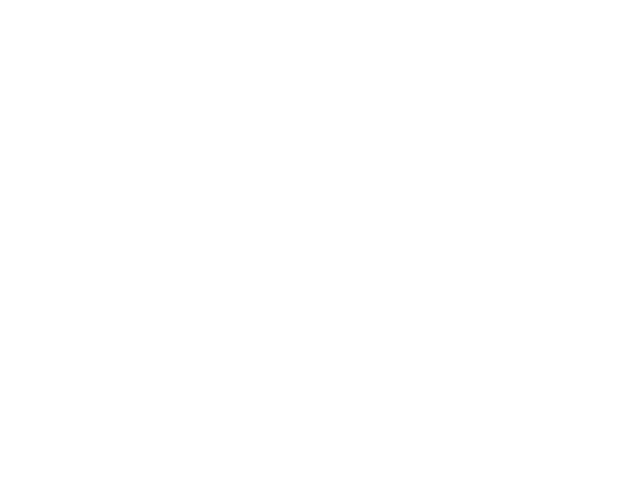

In [14]:
a = sy.Matrix([[2], [3], [4]])

# Import extra modules necessary for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[0], a[1], a[2], color="g", label="a")
ax.scatter(2*a[0], 2*a[1], 2*a[2], color="r", label="2a")
ax.scatter(0, 0, 0, color="k")
ax.legend(loc="best")

In [15]:
plt.close()

<p>Vectors in $\mathbb{R}^n$ are just like in $\mathbb{R}^2$ or $\mathbb{R}^3$, but generalized for any number of dimensions. For any real number $n$, vectors in $\mathbb{R}^n$ have the same algebraic properties:</p>

<ul>
    <li>$\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$</li>
    <li>$(\mathbf{u} + \mathbf{v}) + \mathbf{w} = \mathbf{u} + (\mathbf{v} + \mathbf{w})$</li>
    <li>$\mathbf{u} + 0 = 0 + \mathbf{u} = \mathbf{u}$</li>
    <li>$\mathbf{u} + (-\mathbf{u}) = -\mathbf{u} + \mathbf{u} = 0$</li>
    <li>$c (\mathbf{u} + \mathbf{v}) = c \mathbf{u} + c \mathbf{v}$</li>
    <li>$(c + d) \mathbf{u} = c \mathbf{u} + d \mathbf{u}$</li>
    <li>$c(d \mathbf{u}) = (cd) \mathbf{u}$</li>
    <li>$1 \mathbf{u} = \mathbf{u}$</li>
</ul>

<h3>Example 5: Finding linear combinations of vectors</h3>

<p>If $\mathbf{a_1} = \left[ \begin{array}{r} 1\\-2\\-5\\ \end{array} \right]$ and $\mathbf{a_2} = \left[ \begin{array}{r} 2\\5\\6\\ \end{array} \right]$, find a linear combination of these to equal $\mathbf{b} = \left[ \begin{array}{r} 7\\4\\-3\\ \end{array} \right]$</p>

<p>We want to find values $x_1$ and $x_2$, such that $x_1 \mathbf{a_1} + x_2 \mathbf{a_2} = \mathbf{b}$</p>

<p>So, using the multiplication properties of vectors, we are really trying to find $x$ values such that:</p>

<p>$x_1 + 2x_2 = 7$<br>$-2x_1 + 5 x_2 = 4$<br>$-5x_1 + 6x_2 = -3$</p>

<p>We can easily turn this into an augmented matrix and solve for $x_1$ and $x_2$ exactly like in previous sections</p>

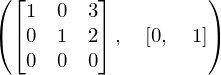

In [16]:
A = sy.Matrix([[1,2,7], [-2,5,4], [-5,6,-3]])
A.rref()

<p>Using the reduced echelon of the augmented matrix, we find that $x_1 = 3$ and $x_2 = 2$. Now test:</p>

<p>$3 \left[ \begin{array}{r} 1\\-2\\-5\\ \end{array} \right] + 2 \left[ \begin{array}{r} 2\\5\\6\\ \end{array} \right] = \left[ \begin{array}{r} 7\\4\\-3\\ \end{array} \right]$</p>

<p>Yep, it works</p>

<p>The augmented matrix we built from multiple vectors is often written short-hand as a one-row matrix of vectors:</p>

<p>$\left[ \begin{array}{rrr} \mathbf{a_1} & \mathbf{a_2} & \mathbf{b} \\ \end{array} \right]$</p>

<h3>Definition of span</h3>

<p>Assume the vectors $\mathbf{v}_1 \ldots \mathbf{v}_p$ are in $\mathbb{R}^n$, then Span$\{\mathbf{v}_1 \ldots \mathbf{v}_p \}$ is the set of all linear combinations of $\mathbf{v}_1 \ldots \mathbf{v}_p$</p>

<p>I.e. Span$\{\mathbf{v}_1 \ldots \mathbf{v}_p\}$ is the set of all vectors that can be represented by<br>
$c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \ldots + c_p \mathbf{v}_p$</p>

<p>Span$\{\mathbf{v}_1 \ldots \mathbf{v}_p \}$ is the <b>subset</b> of $\mathbb{R}^n$ spanned by $\mathbf{v}_1 \ldots \mathbf{v}_p$.</p>

<p>Determining if a vector $\mathbf{b}$ is in Span$\{\mathbf{v}_1 \ldots \mathbf{v}_p\}$ is equivalent to asking if there exists a solution to the system represented by the augmented matrix:<br>
$\left[ \begin{array}{rrrr} \mathbf{v}_1 & \ldots & \mathbf{v}_p & \mathbf{b}\\ \end{array} \right]$<br>
as we did in Example 5 above. Thus,</p>

<p>$\mathbf{b} = \left[ \begin{array}{r} 7\\4\\-3\\ \end{array} \right]$ is in Span$\{\mathbf{a}_1, \mathbf{a}_2\}$ above, since the solution $x_1 = 3, x_2 = 2$ exists.</p>

<h3>Example 6</h3>

In [17]:
a_1 = sy.Matrix([[1], [-2], [3]])
a_2 = sy.Matrix([[5], [-13], [-3]])
b = sy.Matrix([[-3], [8], [1]])

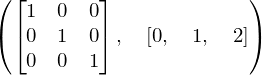

In [18]:
M = a_1.row_join(a_2).row_join(b)
M.rref()

<p>$0 = 1$ is of course a contradition, so $\mathbf{b}$ is <b>not</b> in Span$\{\mathbf{a}_1, \mathbf{a}_2\}$</p>

<h3>Example 7: Real-world application of Span</h3>

<h4>Cost to produce an item</h4>
<table>
    <tr>
        <td>Cost/item</td>
        <td>$\times$</td>
        <td>quantity</td>
        <td>$=$</td>
        <td>Total cost</td>
    </tr>
</table>

<p>can be broken down to individual costs, e.g. materials, labor, overhead.</p>

<p>$\$1$ worth of product $B$ costs $\$0.45$ for materials, $\$0.25$ for labor, and $\$0.15$ for overhead:</p>

<p>$ \mathbf{b} = \left[ \begin{array}{r} .45\\.25\\.15\\ \end{array} \right]$</p>

<p>For product $C$, these values are $\$0.40, \$0.30$, and $\$0.15$ respectively:</p>

<p>$ \mathbf{c} = \left[ \begin{array}{r} .40\\.30\\.15\\ \end{array} \right]$</p>

<p>a) simply put, $100\mathbf{b}$ is the cost for $\$100$ worth of product $B$.</p>
<p>b) $x_1 \mathbf{b} + x_2 \mathbf{c}$</p>

<h3>Exercise 27: Application of Span to solve a system</h3>

<p>A mining company operates two mines. One day of operation produces 20 tons of Cu and 550 kg Ag at Mine 1, or 30 tons Cu and 500 kg Ag at Mine 2.</p>

<p>Let Mine 1 = $\mathbf{m}_1 = \left[ \begin{array}{r} 20\\550\\ \end{array} \right]$</p>
<p>Let Mine 2 = $\mathbf{m}_2 = \left[ \begin{array}{r} 30\\500\\ \end{array} \right]$</p>

<p>How many days should each mine operate to produce 150 tons Cu and 2825 kg Ag?, $\mathbf{b} = \left[ \begin{array}{r} 150\\2825\\ \end{array} \right]$</p>

In [19]:
m_1 = sy.Matrix([[20], [550]])
m_2 = sy.Matrix([[30], [500]])
b = sy.Matrix([[150], [2825]])

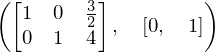

In [20]:
M = m_1.row_join(m_2).row_join(b)
M.rref()

<p>$x_1 = 1.5, x_2 = 4$, so Mine 1 should operate for 1.5 days, and Mine 2 for 4 days. Double-check:</p>

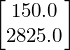

In [21]:
1.5 * m_1 + 4 * m_2